# Plotting Results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Answer Distributions

In [2]:
import json
import re
from collections import Counter

def count_answer_distribution(jsonl_path):
    counter = Counter()

    with open(jsonl_path, "r") as f:
        for line in f:
            record = json.loads(line)
            match = re.search(r"<answer>([A-D])</answer>", record["completion"])
            if match:
                counter[match.group(1)] += 1

    return counter

distribution = count_answer_distribution("../data/final_mcqs_test.jsonl")

print("Test Answer Distribution:")
for choice in ["A", "B", "C", "D"]:
    print(f"{choice}: {distribution.get(choice, 0)}")

distribution = count_answer_distribution("../data/final_mcqs_train.jsonl")

print("\nTrain Answer Distribution:")
for choice in ["A", "B", "C", "D"]:
    print(f"{choice}: {distribution.get(choice, 0)}")


Test Answer Distribution:
A: 27
B: 29
C: 32
D: 15

Train Answer Distribution:
A: 98
B: 101
C: 107
D: 101


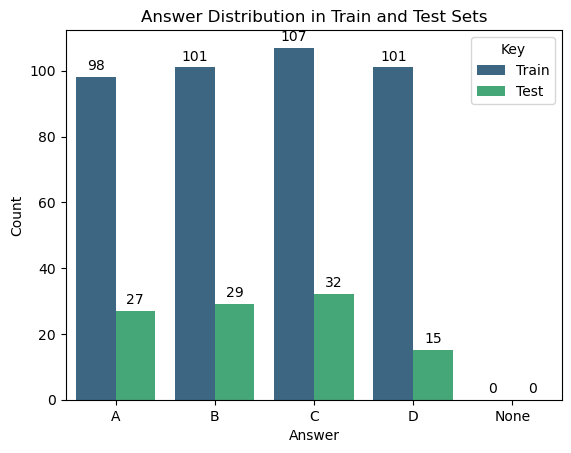

In [3]:
# Dictionaries
test_distribution = {'A': 27, 'B': 29, 'C': 32, 'D': 15, 'None': 0}
train_distribution = {'A': 98, 'B': 101, 'C': 107, 'D': 101, 'None': 0}

# Data for DataFrame
labels = list(test_distribution.keys())
train_values = list(train_distribution.values())
test_values = list(test_distribution.values())

# Make the DataFrame
data = {
    'Answer': labels * 2,
    'Count': train_values + test_values,
    'Key': ['Train'] * 5 + ['Test'] * 5
}
df = pd.DataFrame(data)

# Plot
ax = sns.barplot(data=df, x='Answer', y='Count', palette="viridis", hue='Key')
# Add counts above bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)
plt.title('Answer Distribution in Train and Test Sets')
plt.show()


In [4]:
def plot_eval_bar_chart(result_data, title, xlabel, ylabel):
    # Data for DataFrame
    labels = list(test_distribution.keys())
    result_values = list(result_data.values())
    test_values = list(test_distribution.values())

    # Make the DataFrame
    data = {
        'Answer': labels * 2,
        'Count': result_values + test_values,
        'Key': ['Model Output'] * 5 + ['Ground Truth'] * 5
    }
    df = pd.DataFrame(data)

    # Plot
    ax = sns.barplot(data=df, x='Answer', y='Count', palette="viridis", hue='Key')
    # Add counts above bars
    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=10)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

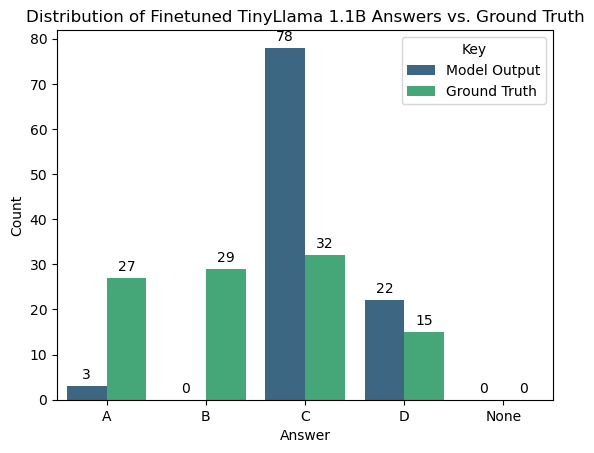

In [5]:
title = 'Distribution of Finetuned TinyLlama 1.1B Answers vs. Ground Truth'
result_data = {
    'A': 3,
    'B': 0,
    'C': 78,
    'D': 22,
    'None': 0
}
xlabel = 'Answer'
ylabel = 'Count'
plot_eval_bar_chart(result_data, title, xlabel, ylabel)

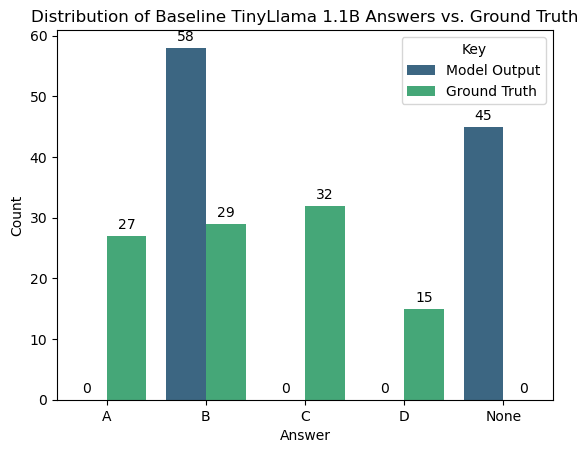

In [6]:
title = 'Distribution of Baseline TinyLlama 1.1B Answers vs. Ground Truth'
result_data = {
    'A': 0,
    'B': 58,
    'C': 0,
    'D': 0,
    'None': 45
}
xlabel = 'Answer'
ylabel = 'Count'
plot_eval_bar_chart(result_data, title, xlabel, ylabel)

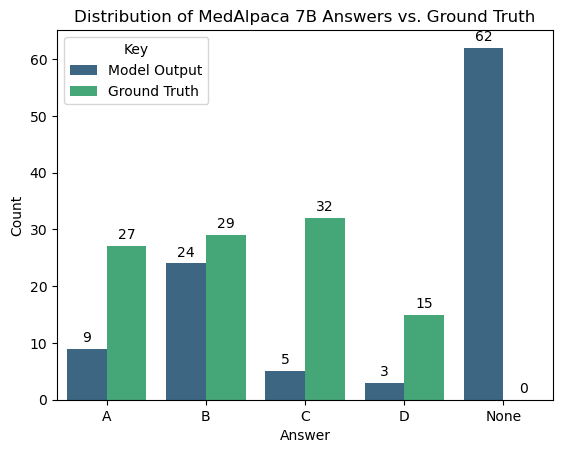

In [7]:
title = 'Distribution of MedAlpaca 7B Answers vs. Ground Truth'
result_data = {
    'A': 9,
    'B': 24,
    'C': 5,
    'D': 3,
    'None': 62
}
xlabel = 'Answer'
ylabel = 'Count'
plot_eval_bar_chart(result_data, title, xlabel, ylabel)

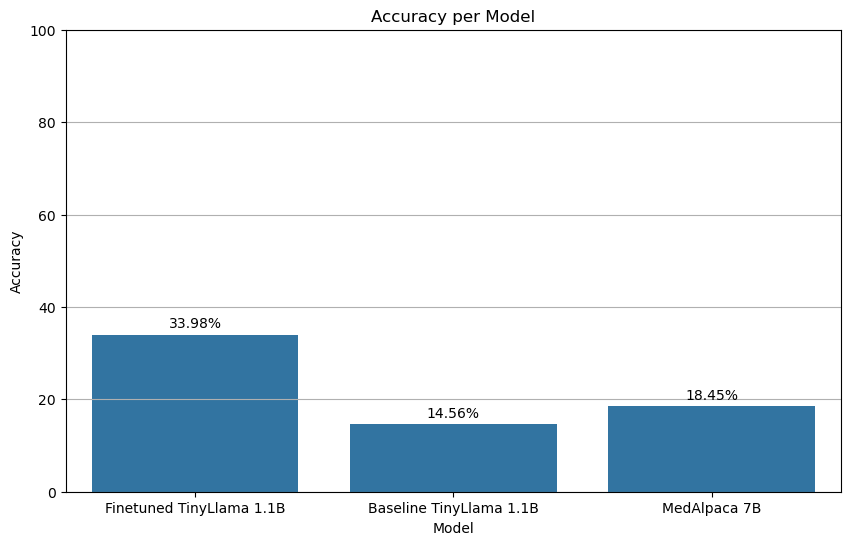

In [57]:
models = ['Finetuned TinyLlama 1.1B', 'Baseline TinyLlama 1.1B', 'MedAlpaca 7B']
accuracies = [33.98, 14.56, 18.45]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make DataFrame
df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Model', y='Accuracy')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3)

plt.title('Accuracy per Model')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


## Preview Data

In [53]:
from IPython.display import JSON

In [51]:
sampled = {"question":"What causes Gum (Periodontal) Disease?","answer":"Gum disease is caused by dental plaque -- a sticky film of bacteria that builds up on teeth. Regular brushing and flossing help get rid of plaque. But plaque that is not removed can harden and form tartar that brushing doesn't clean. Only a professional cleaning by a dentist or dental hygienist can remove tartar."}
JSON(sampled)

<IPython.core.display.JSON object>

In [54]:
generated = {"question": "What causes Gum (Periodontal) Disease?", "mcq_choices": "A. Genetic mutations\nB. Poor dental hygiene\nC. Injury to the gums\nD. Periodontal abscesses", "mcq_reason": "Gum disease is caused by dental plaque -- a sticky film of bacteria that builds up on teeth. Regular brushing and flossing help get rid of plaque. But plaque that is not removed can harden and form tartar that brushing doesn't clean. Only a dentist or dental hygienist can remove tartar.", "mcq_answer": "B"}
JSON(generated)

<IPython.core.display.JSON object>

In [55]:
JSON({"prompt": "You are a helpful and concise medical assistant.\n\nAnswer the following multiple-choice question. First, briefly explain your reasoning using relevant medical knowledge. Then state your final answer letter using exactly one <answer></answer> tag.\n\nInstructions:\n- Use only one <answer> tag (e.g., <answer>B</answer>)\n- Choose the best answer letter\n- Stop immediately after the </answer> tag\n\n<question>\nWhat causes Gum (Periodontal) Disease?\nA. Genetic mutations\nB. Poor dental hygiene\nC. Injury to the gums\nD. Periodontal abscesses\n</question>\n", "completion": "Gum disease is caused by dental plaque -- a sticky film of bacteria that builds up on teeth. Regular brushing and flossing help get rid of plaque. But plaque that is not removed can harden and form tartar that brushing doesn't clean. Only a dentist or dental hygienist can remove tartar.\n<answer>B</answer>"}
)

<IPython.core.display.JSON object>